##### Bài 1:
* Đếm số chuyến bay trễ của các sân bay (cột ‘origin’)
* Tương tự, đếm số chuyến bay không trễ của các sân bay
* Tạo bảng hiển thị số chuyến bay trễ vs. không trễ
* Vẽ lên biểu đồ
##### Bài 2: 
* Thực hiện tương tự với các hãng hàng không (cột ‘carrier’)
##### Bài 3:
* Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình của các hãng
* Tính thời gian trễ (gồm dep_delay và arr_delay) trung bình từ các sân bay
* Vẽ các kết quả lên biểu đồ
##### Bài 4: 
* Tính tổng, trung bình, mean, median của quãng đường bay của từng hãng (cột distance)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('nycflights.csv')

df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336776 non-null  int64  
 1   year        336776 non-null  int64  
 2   month       336776 non-null  int64  
 3   day         336776 non-null  int64  
 4   dep_time    328521 non-null  float64
 5   dep_delay   328521 non-null  float64
 6   arr_time    328063 non-null  float64
 7   arr_delay   327346 non-null  float64
 8   carrier     336776 non-null  object 
 9   tailnum     334264 non-null  object 
 10  flight      336776 non-null  int64  
 11  origin      336776 non-null  object 
 12  dest        336776 non-null  object 
 13  air_time    327346 non-null  float64
 14  distance    336776 non-null  int64  
 15  hour        328521 non-null  float64
 16  minute      328521 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 43.7+ MB


In [122]:
# Sort the DataFrame based on a time-based column
df = df.sort_values('dep_time')

# Interpolate the null values in the 'dep_delay' column using linear interpolation
df['dep_delay'] = df['dep_delay'].interpolate(method='linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 250450 to 336775
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336776 non-null  int64  
 1   year        336776 non-null  int64  
 2   month       336776 non-null  int64  
 3   day         336776 non-null  int64  
 4   dep_time    328521 non-null  float64
 5   dep_delay   336776 non-null  float64
 6   arr_time    328063 non-null  float64
 7   arr_delay   327346 non-null  float64
 8   carrier     336776 non-null  object 
 9   tailnum     334264 non-null  object 
 10  flight      336776 non-null  int64  
 11  origin      336776 non-null  object 
 12  dest        336776 non-null  object 
 13  air_time    327346 non-null  float64
 14  distance    336776 non-null  int64  
 15  hour        328521 non-null  float64
 16  minute      328521 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 46.2+ MB


In [123]:
# Count flight delays by origin
delay_counts = df[df['dep_delay'] > 0]['origin'].value_counts()

print(delay_counts)

origin
EWR    55950
JFK    43894
LGA    36843
Name: count, dtype: int64


In [124]:
# Count non-delayed flights by origin
non_delay_counts = df[df['dep_delay'] <= 0]['origin'].value_counts()

print(non_delay_counts)

origin
LGA    67819
JFK    67385
EWR    64885
Name: count, dtype: int64


In [125]:
# Create a table with delayed and non-delayed counts
table = pd.DataFrame({'Delayed' : delay_counts, 'Non-delayed' :  non_delay_counts})

print(table)

        Delayed  Non-delayed
origin                      
EWR       55950        64885
JFK       43894        67385
LGA       36843        67819


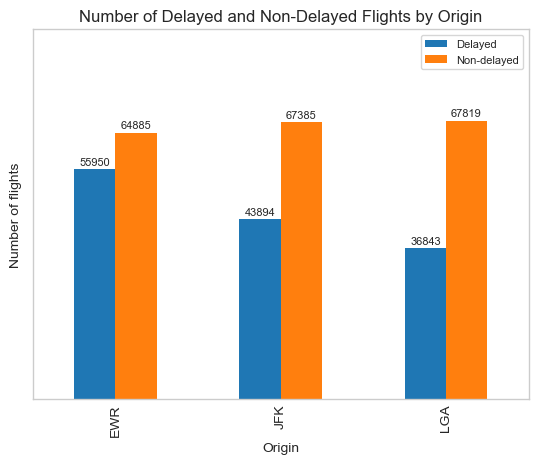

In [140]:
ax = table.plot(kind='bar')

# Set the chart title and labels
plt.title("Number of Delayed and Non-Delayed Flights by Origin")
plt.xlabel("Origin")
plt.ylabel("Number of flights")

for i, (origin, row) in enumerate(table.iterrows()):
    delayed_count = row['Delayed']
    non_delayed_count = row['Non-delayed']

    # Add annotations for delayed counts
    ax.text(i - 0.215, delayed_count + 1000, str(delayed_count), size=8)

    # Add annotations for non-delayed counts
    ax.text(i + 0.03, non_delayed_count + 1000, str(non_delayed_count), size=8)

ax.legend(loc='upper right', fontsize=8, frameon=True)
ax.set_yticklabels([])
ax.grid(False)
ax.set_ylim(0, 90000)
plt.show()

In [143]:
# Count flight delays by carrier
delay_carrier = df[df['dep_delay'] > 0]['carrier'].value_counts()

# Count flight delays by non_carrier
non_delay_carrier = df[df['dep_delay'] <= 0]['carrier'].value_counts()

print(delay_carrier)
print(non_delay_carrier)

carrier
UA    27947
EV    25956
B6    21911
DL    15590
AA    10798
MQ     9265
9E     8107
WN     6750
US     5438
VX     2256
FL     1727
F9      344
YV      289
AS      228
HA       69
OO       12
Name: count, dtype: int64
carrier
B6    32724
DL    32520
UA    30718
EV    28217
AA    21931
MQ    17132
US    15098
9E    10353
WN     5525
VX     2906
FL     1533
AS      486
F9      341
YV      312
HA      273
OO       20
Name: count, dtype: int64
         Delayed-carrier  Non-delayed-carrier
carrier                                      
9E                  8107                10353
AA                 10798                21931
AS                   228                  486
B6                 21911                32724
DL                 15590                32520
EV                 25956                28217
F9                   344                  341
FL                  1727                 1533
HA                    69                  273
MQ                  9265                17

In [144]:
# Create a table with delayed and non-delayed by carrier
table_carrier = pd.DataFrame({'Delayed-carrier' : delay_carrier, 'Non-delayed-carrier' :  non_delay_carrier})

print(table_carrier)

         Delayed-carrier  Non-delayed-carrier
carrier                                      
9E                  8107                10353
AA                 10798                21931
AS                   228                  486
B6                 21911                32724
DL                 15590                32520
EV                 25956                28217
F9                   344                  341
FL                  1727                 1533
HA                    69                  273
MQ                  9265                17132
OO                    12                   20
UA                 27947                30718
US                  5438                15098
VX                  2256                 2906
WN                  6750                 5525
YV                   289                  312


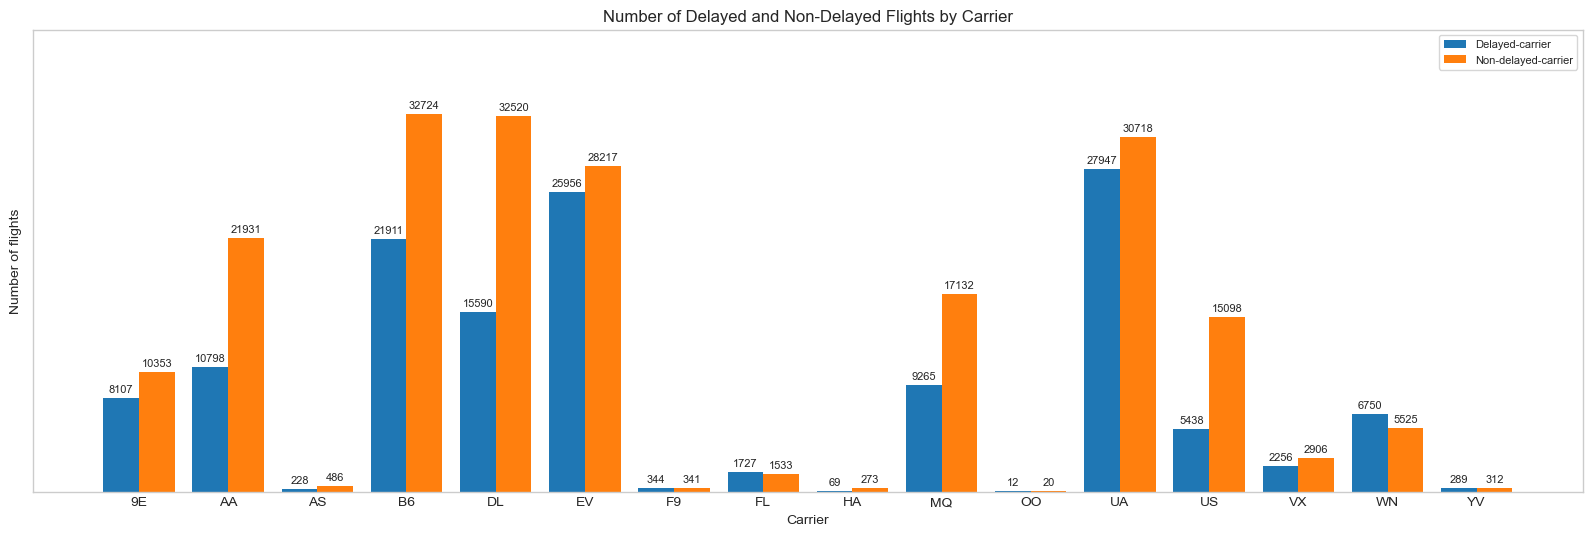

In [173]:
fig, ax = plt.subplots(figsize=(20, 6))

width = 0.4  # Độ rộng của mỗi cột
x = np.arange(len(table_carrier))  
# Vẽ cột "delayed"
ax.bar(x - width/2, table_carrier['Delayed-carrier'], width, label='Delayed-carrier')
# Vẽ cột "non-delayed"
ax.bar(x + width/2, table_carrier['Non-delayed-carrier'], width, label='Non-delayed-carrier')

ax.set_title("Number of Delayed and Non-Delayed Flights by Carrier")
ax.set_xlabel("Carrier")
ax.set_ylabel("Number of flights")

# Đặt các nhãn cho trục x
ax.set_xticks(x)
ax.set_xticklabels(table_carrier.index)

for i, (carrier, row) in enumerate(table_carrier.iterrows()):
    delayed_carrier = row['Delayed-carrier']
    non_delayed_carrier = row['Non-delayed-carrier']

    # Thêm nhãn cho cột delayed_carrier
    ax.text(i - width/2, delayed_carrier + 500, str(delayed_carrier), size=8, ha='center')

    # Thêm nhãn cho cột non_delayed_carrier
    ax.text(i + width/2, non_delayed_carrier + 500, str(non_delayed_carrier), size=8, ha='center')

ax.legend(loc='upper right', fontsize=8, frameon=True)
ax.set_yticklabels([])
ax.grid(False)
ax.set_ylim(0, 40000)
plt.show()